In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

## Modelling

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
model=RandomForestClassifier(random_state=48)

start_time = timeit.default_timer()
model.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(X_test1)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  379.667682


In [6]:
print(f"Accuracy score:{accuracy_score(y_test1, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test1, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test1, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test1, y_pred1):.4f}")

Accuracy score:0.9779
F1 score : 0.9775
Recall score : 0.9598
Precision score : 0.9959


<AxesSubplot:>

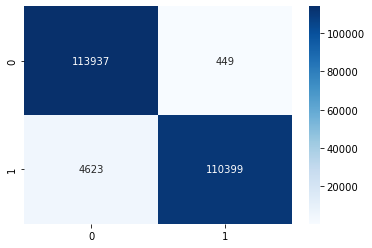

In [10]:
sns.heatmap(confusion_matrix(y_test1,y_pred1),annot=True,fmt='', cmap='Blues')

In [8]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114386
           1       1.00      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



### Data with Resampling and with OneHotEncoding

In [11]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [12]:
model=RandomForestClassifier(random_state=48)
start_time = timeit.default_timer()
model.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(X_test)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  431.1879317999999


In [13]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score:0.9773
F1 score : 0.9769
Recall score : 0.9599
Precision score : 0.9945


In [14]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 48,
 'verbose': 0,
 'warm_start': False}

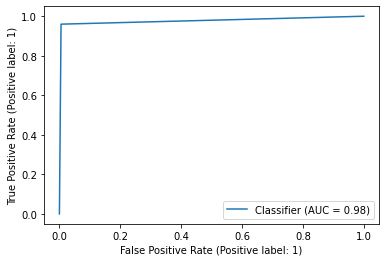

In [17]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

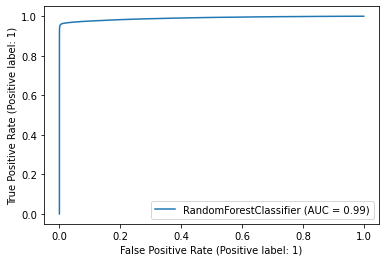

In [19]:
RocCurveDisplay.from_estimator(model,X_test,y_test)

In [32]:
rf_reg = RandomForestClassifier(random_state=48)

start_time = timeit.default_timer()
rf_reg.fit(X_train,y_train)
#perform k fold

cv_r2_scores_rf = cross_val_score(rf_reg, X, Y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

elapsed = timeit.default_timer() - start_time
print(elapsed)

[0.61727577 0.98066319 0.97996574 0.98088986 0.98001805]
Mean 5-Fold R Squared: 0.9077625205193278
2639.3376154


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise

#### As 4 subsets gave accuracy of 98 we can conside the above model result is not overfitting

#### There is same accuracy with and without OneHotEncoding

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

In [3]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [5]:
#Base Model
rfc=RandomForestClassifier(random_state=48)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =2000 , num = 10)]
# Number of features to consider at every split
#max_features = None
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#max_depth=None
#Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
params = {'criterion' :['gini', 'entropy'],
               'n_estimators': n_estimators
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf
               }
print(params)

{'criterion': ['gini', 'entropy'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [7]:

grid_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5,n_jobs=4)


start_time = timeit.default_timer()

grid_rfc.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
print("Elapsed time in sec is ",elapsed)
#Elapsed time in sec is  158924.85709980002

C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
19 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    w

Elapsed time in sec is  158924.85709980002


In [8]:
grid_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 1400}

In [10]:
model=RandomForestClassifier(random_state=48,criterion='entropy',n_estimators=1400)

start_time = timeit.default_timer()
model.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time

y_pred1=model.predict(X_test)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  6263.018664299976


In [11]:
print('The accuracy of the Random Forest Classifier is ',accuracy_score(y_test, y_pred1))
print('The Precision Score of the Random Forest Classifier is ',precision_score(y_test, y_pred1))
print('The Recall Score of the Random Forest Classifier is ',recall_score(y_test, y_pred1))
print('The F1 score of the Random Forest Classifier is ',f1_score(y_test, y_pred1))

The accuracy of the Random Forest Classifier is  0.9775334774724508
The Precision Score of the Random Forest Classifier is  0.9943931457782098
The Recall Score of the Random Forest Classifier is  0.9606075359496444
The F1 score of the Random Forest Classifier is  0.9772084055612552


<AxesSubplot:>

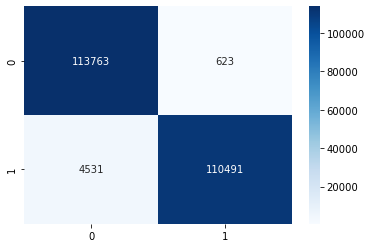

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, fmt='', cmap='Blues')

In [14]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    114386
           1       0.99      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



In [15]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    114386
           1       0.99      0.96      0.98    115022

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408



In [8]:

grid_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5)


start_time = timeit.default_timer()

grid_rfc.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
print("Elapsed time in sec is ",elapsed)
#Elapsed time in sec is  42361.7096248

C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
41 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    wh

Elapsed time in sec is  42361.7096248


In [9]:
grid_rfc.best_params_
#{'criterion': 'entropy', 'n_estimators': 200}

{'criterion': 'entropy', 'n_estimators': 200}

In [ ]:
rf_random.best_params_

In [ ]:
print('The accuracy of the Random Forest Classifier is ',accuracy_score(y_test, y_pred2))
print('The Precision Score of the Random Forest Classifier is ',precision_score(y_test, y_pred2))
print('The Recall Score of the Random Forest Classifier is ',recall_score(y_test, y_pred2))
print('The F1 score of the Random Forest Classifier is ',f1_score(y_test, y_pred2))

In [ ]:
sns.heatmap(confusion_matrix(y_test1,y_pred2),annot=True, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test1, y_pred2))

In [7]:
#Randomized Search CV


rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 5, verbose=2, random_state=48)


start_time = timeit.default_timer()

# Fit the random search model
rf_random.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
print("Elapsed time in sec is ",elapsed)

C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


MemoryError: Unable to allocate 1.16 GiB for an array with shape (734102, 212) and data type float64

In [ ]:

print('The accuracy of the Random Forest Classifier is ',accuracy_score(y_test1, y_pred3))
print('The Precision Score of the Random Forest Classifier is ',precision_score(y_test1, y_pred3))
print('The Recall Score of the Random Forest Classifier is ',recall_score(y_test1, y_pred3))
print('The F1 score of the Random Forest Classifier is ',f1_score(y_test1, y_pred3))

In [ ]:
sns.heatmap(confusion_matrix(y_test1,y_pred3),annot=True, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test1, y_pred3))